In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp 

ModuleNotFoundError: No module named 'cv2'

In [2]:
mp_facemesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
denormalize_coords = mp_drawing._normalized_to_pixel_coordinates

%matplotlib inline

In [10]:
# Landmark points coordinating to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# Flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs))

print(f'All the left eye indexs: {all_left_eye_idxs}')

all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

print(f'All the right eye indexes: {all_right_eye_idxs}')

# Landmark points for both eye
all_eye_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

print(f'All the eye indexes: {all_eye_idxs}')

# The chose 12 points: This coordinate taken from the paper
chosen_left_eye_idxs = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33, 160, 158, 133, 153, 144]

all_chosen_eye_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

print(f'All the chosen eye indexes: {all_chosen_eye_idxs}')

All the left eye indexs: {384, 385, 386, 387, 388, 390, 263, 362, 398, 466, 373, 374, 249, 380, 381, 382}
All the right eye indexes: {160, 33, 161, 163, 133, 7, 173, 144, 145, 246, 153, 154, 155, 157, 158, 159}
All the eye indexes: {384, 385, 386, 387, 388, 133, 390, 263, 7, 398, 144, 145, 466, 153, 154, 155, 157, 158, 159, 160, 33, 161, 163, 362, 173, 373, 374, 246, 249, 380, 381, 382}
All the chosen eye indexes: [362, 385, 387, 263, 373, 380, 33, 160, 158, 133, 153, 144]


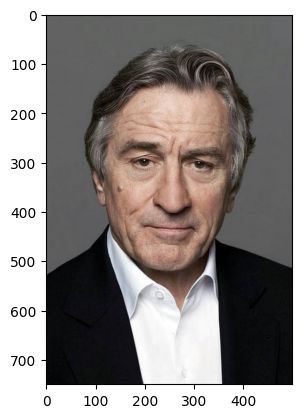

In [13]:
# Landmark detection API on a sample image

# load the image
image = cv2.imread('open-eyes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.ascontiguousarray(image)
imgH, imgW, _ = image.shape

plt.imshow(image)
plt.show()

In [15]:
# Running inferecne using static_image_mode

with mp_facemesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    results = face_mesh.process(image)

print(bool(results.multi_face_landmarks))

True


In [ ]:
landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)

landmark_0_x = landmark_0.x * imgW
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW

print()

print("X: ", landmark_0_x)
print("Y: ", landmark_0_y)
print("Z: ", landmark_0_z)

print()

print("Total length of '.landmark': ", len(results.multi_face_landmarks[0].landmark))




x: 0.508381665
y: 0.572850108
z: -0.0340891406


X:  254.1908323764801
Y:  429.6375811100006
Z:  -17.044570297002792

Total length of '.landmark':  478


In [27]:
def plot(
        *,
        img_dt,
        img_eye_lmks=None,
        img_eye_lmks_chosen=None,
        face_landmarks=None,
        ts_thickness=1,
        ts_circle_radius=2,
        lmk_circle_radius=3,
        name="1",
):
    # for plotting face tessellation
    image_drawing_tool = img_dt

    # for plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks

    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness = ts_thickness,
        circle_radius=ts_circle_radius,
        color=(255, 255, 255)
    )

    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor('white')

    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,  # Corrected here
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )


    landmarks = face_landmarks.landmark

    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_eye_idxs:
            pred_cord = denormalize_coords(landmark.x,
                                           landmark.y,
                                           imgW, imgH)
            
            cv2.circle(image_eye_lmks,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1)
            
        if landmark_idx in all_chosen_eye_idxs:
            pred_cord = denormalize_coords(landmark.x,
                                           landmark.y,
                                           imgW, imgH)
            
            cv2.circle(img_eye_lmks_chosen,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1)
            
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen Landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return


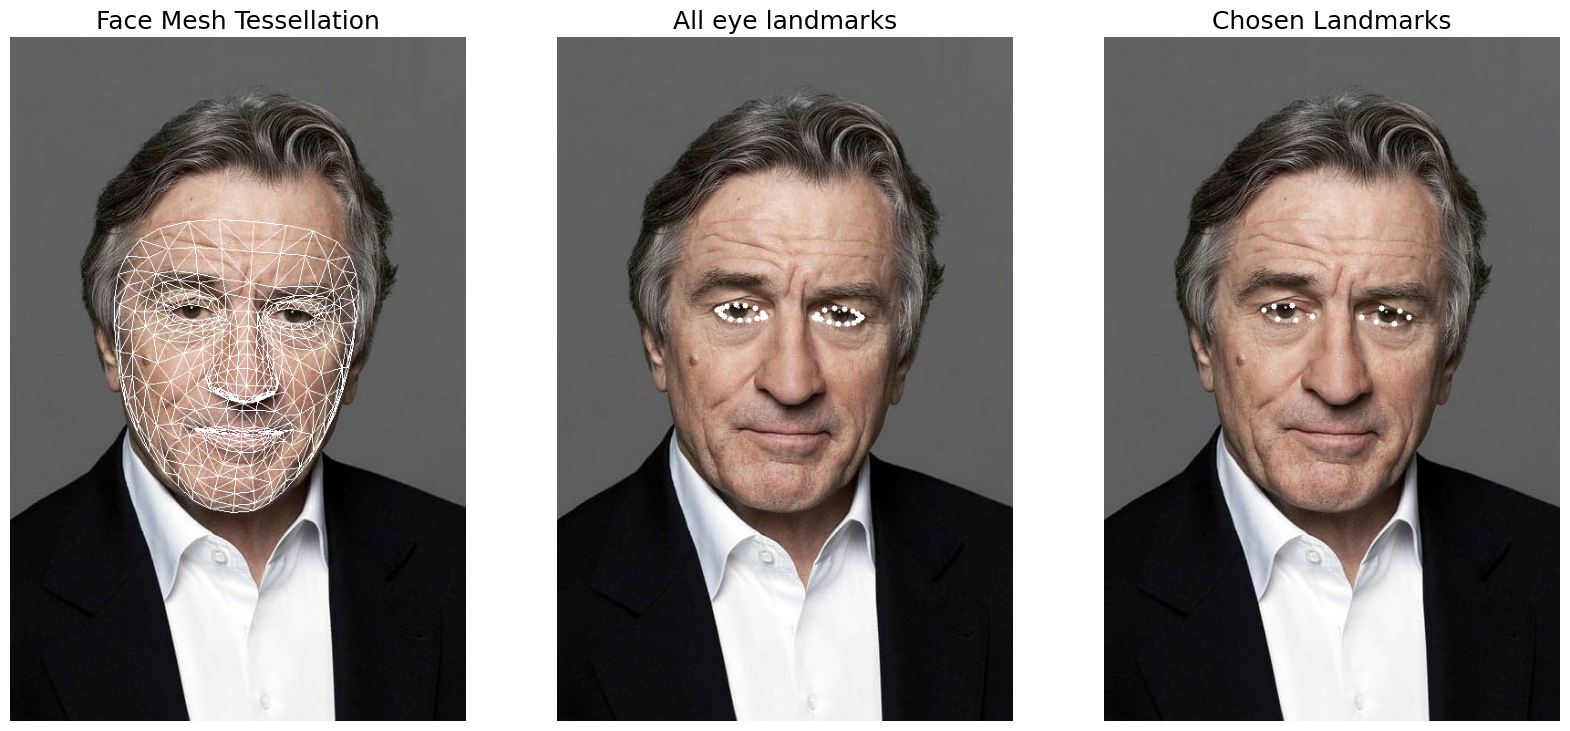

In [28]:
# If detections are available.
if results.multi_face_landmarks:
     
    # Iterate over detections of each face. Here, we have max_num_faces=1, 
    # So there will be at most 1 element in 
    # the 'results.multi_face_landmarks' list            
    # Only one iteration is performed.
 
    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):    
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks)

In [29]:
# In general, the Avg. EAR value lies in range [0.0, 0.40]. The EAR value rapidly decreases during “eye closing” action


In [30]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

In [31]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.
    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of the captured frame
        frame_height: (int) Height of captured frame

    Returns:
        ear: (float) Eye aspect ratio 
    """
    try:
        # compute the eclidean distance between the horizontal
        coordinate_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coordinate = denormalize_coords(lm.x, lm.y,
                                            frame_width, frame_height)
            
            coordinate_points.append(coordinate)

        # Eye landmark (x, y) coordinates
        P2_P6 = distance(coordinate_points[1], coordinate_points[5])
        P3_P5 = distance(coordinate_points[2], coordinate_points[4])
        P1_P4 = distance(coordinate_points[2], coordinate_points[5])

        # Compute the eye aspect ratio

        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)

    except:
        ear = 0.0
        coordinate_points = None
    
    return ear, coordinate_points


In [32]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""
    left_ear, left_lm_coordinates = get_ear(landmarks, left_eye_idxs, image_w, image_h)
    right_ear, right_lm_coordinates = get_ear(landmarks, right_eye_idxs, image_w, image_h)

    avg_ear = (left_ear + right_ear) / 2.0

    return avg_ear, (left_lm_coordinates, right_lm_coordinates)

_In general, the Avg. EAR value lies in range **[0.0, 0.40]**. The EAR value rapidly decreases during **“eye closing”** action._

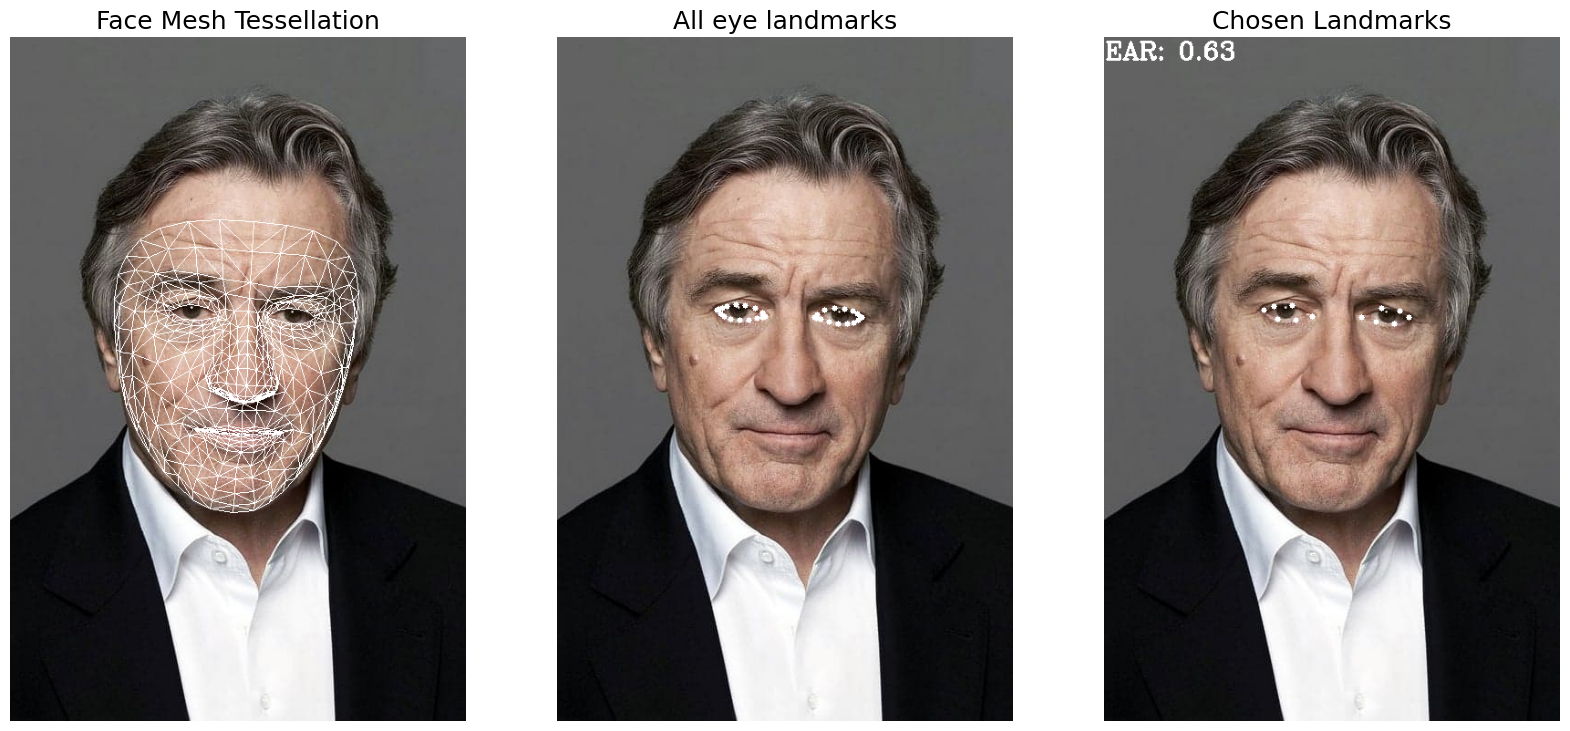

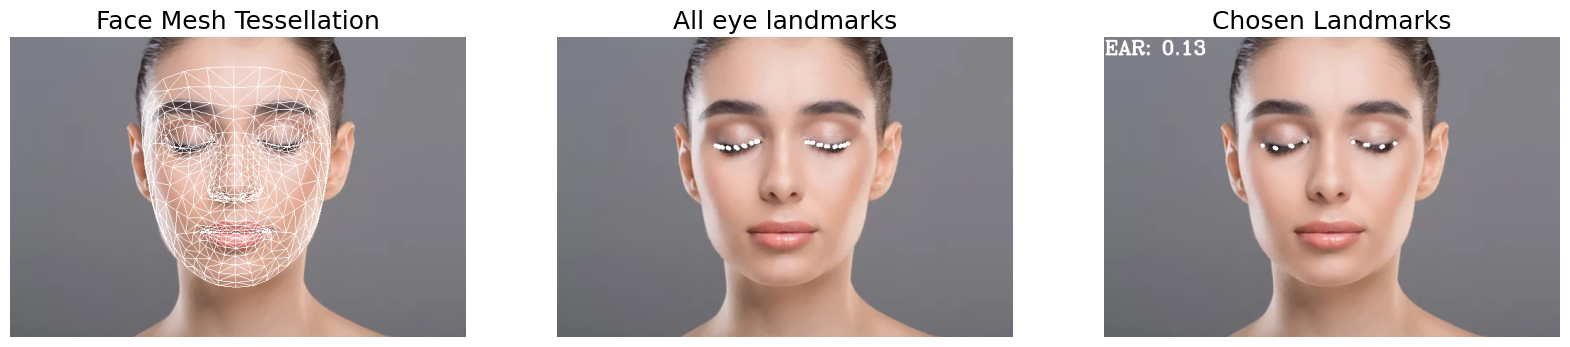

In [37]:
image_eyes_open = cv2.imread('open-eyes.jpg')[:, :, ::-1]
image_eyes_close = cv2.imread('close-eyes.png')[:, :, ::-1]

for idx, image in enumerate([image_eyes_open, image_eyes_close]):
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    custom_chosen_lmk_image = image.copy()

    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks

        # if detections are avaliable:
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                EAR, _ = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)

                cv2.putText(custom_chosen_lmk_image, 
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX,
                            0.9, (255, 255, 255), 2)
                
                plot(img_dt=image.copy(), img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks, ts_thickness=1,
                     ts_circle_radius=3, lmk_circle_radius=3)
                


In [75]:
import cv2
import numpy as np

def estimate_head_pose(landmarks, imgW, imgH):
    # 3D model points of key facial landmarks (relative positions)
    model_points = np.array([
        (0.0, 0.0, 0.0),        # Nose tip
        (0.0, -330.0, -65.0),   # Chin
        (-225.0, 170.0, -135.0), # Left eye corner
        (225.0, 170.0, -135.0), # Right eye corner
        (-150.0, -150.0, -125.0), # Left mouth corner
        (150.0, -150.0, -125.0)  # Right mouth corner
    ])

    # 2D image points from landmarks
    image_points = np.array([
        denormalize_coords(landmarks[1].x, landmarks[1].y, imgW, imgH),  # Nose tip
        denormalize_coords(landmarks[152].x, landmarks[152].y, imgW, imgH),  # Chin
        denormalize_coords(landmarks[263].x, landmarks[263].y, imgW, imgH),  # Left eye corner
        denormalize_coords(landmarks[33].x, landmarks[33].y, imgW, imgH),    # Right eye corner
        denormalize_coords(landmarks[61].x, landmarks[61].y, imgW, imgH),    # Left mouth corner
        denormalize_coords(landmarks[291].x, landmarks[291].y, imgW, imgH)   # Right mouth corner
    ], dtype="double")

    # Camera internals (assume no distortion for simplicity)
    focal_length = imgW
    center = (imgW / 2, imgH / 2)
    camera_matrix = np.array([
        [focal_length, 0, center[0]],
        [0, focal_length, center[1]],
        [0, 0, 1]
    ], dtype="double")

    dist_coeffs = np.zeros((4, 1))  # No lens distortion
    success, rotation_vector, translation_vector = cv2.solvePnP(
        model_points, image_points, camera_matrix, dist_coeffs
    )

    # Convert rotation vector to angles
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)
    angles, _, _, _, _, _ = cv2.RQDecomp3x3(rotation_matrix)
    pitch, yaw, roll = angles[0], angles[1], angles[2]
    return pitch, yaw, roll


In [69]:
import  time
from pygame import mixer

In [ ]:
EAR_THRESHOLD = 0.25
CONSECUTIVE_FRAMES = 15


frame_count = 0
status = "AWAKE"
alert_triggered = False

In [81]:
mixer.init()
sound = mixer.Sound('media/alarm.mp3')

# Start video capture
cap = cv2.VideoCapture(0)

with mp_facemesh.FaceMesh(refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        imgH, imgW, _ = frame.shape
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process frame for face landmarks
        results = face_mesh.process(frame_rgb)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # Calculate EAR
                landmarks = face_landmarks.landmark
                avg_ear, _ = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)

                # Update status based on EAR
                if avg_ear < EAR_THRESHOLD:
                    frame_count += 1
                    if frame_count >= CONSECUTIVE_FRAMES and not alert_triggered:
                        status = "DROWSY"
                        alert_triggered = True
                        color = (0, 0, 255)  # Red
                        sound.play()
                else:
                    frame_count = 0
                    status = "AWAKE"
                    alert_triggered = False
                    color = (0, 255, 0)  # Green
                    sound.stop()

                # Overlay EAR and status
                cv2.putText(frame, f"EAR: {avg_ear:.2f}", (30, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                cv2.putText(frame, f"Status: {status}", (30, 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

                # Display red alert banner when drowsy
                if status == "DROWSY":
                    cv2.rectangle(frame, (0, imgH // 2 - 50), (imgW, imgH // 2 + 50), (0, 0, 255), -1)
                    cv2.putText(frame, "ALERT: DROWSY!", (imgW // 4, imgH // 2 + 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3)

                # Draw only eye landmarks
                for idx in chosen_left_eye_idxs + chosen_right_eye_idxs:
                    landmark = landmarks[idx]
                    coord = denormalize_coords(landmark.x, landmark.y, imgW, imgH)
                    if coord:
                        cv2.circle(frame, coord, 2, color, -1)

        # Show video
        cv2.imshow('Drowsiness Detection', frame)

        # Break on 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [44]:
cap.release()
cv2.destroyAllWindows()